# 🌟 Roman Urdu to English Translation Dataset Analysis 🌟
### A Startup Notebook

Welcome to this comprehensive exploratory data analysis (EDA) notebook on a Roman Urdu parallel dataset!  
Here, we will explore sentence structures, word distributions, category insights, and visualize patterns in a beautiful and interactive way.

### 📌 Notebook Highlights
- **Dataset Preview:** Understand the structure and sample entries.
- **Dataset Info & Missing Values:** Quick check for nulls and types.
- **Category Analysis:** Number of sentences per category and distribution plots.
- **Sentence Length Analysis:** Compare sentence lengths in Roman Urdu, Urdu script, and English translations.
- **Top Words & Word Clouds:** Identify frequently used words and generate visually appealing word clouds.
- **Random Examples:** Explore some random sentences from the dataset.
- **Interactive Insights:** Visualizations with colors, emojis, and charts to make EDA engaging.

### 🎯 Purpose of this Notebook
This notebook is designed to:
1. Analyze and visualize the Roman Urdu parallel dataset.
2. Provide insights for NLP tasks, machine translation, and text preprocessing experiments.
3. Serve as a beautiful, educational, and shareable Kaggle notebook for anyone interested in Roman Urdu or multilingual datasets.

🚀 **Let's Dive In!**  
Prepare for a colorful, emoji-rich, and fully visual exploration of the dataset!

# 1️⃣ Imports
First, let's import all the necessary libraries for data manipulation, visualization, and NLP tasks. 📦

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import warnings

# Setup visual theme and ignore warnings for a cleaner notebook
sns.set_theme(style="whitegrid", palette="muted")
warnings.filterwarnings('ignore')

print("✅ All libraries imported successfully!")

✅ All libraries imported successfully!


# 2️⃣ Load Dataset
Let's load our CSV file into a Pandas DataFrame and take a quick look at the first few rows to understand the structure. 📂

In [4]:
# Replace 'your_dataset.csv' with the actual path to your dataset
df = pd.read_csv('Roman_Urdu_Parallel_Translation.csv')

# Display the first 5 rows
display(df.head())

,category,roman_urdu,urdu_script,translated_by_llm,translated_by_google
0,Health,mujhe bukhar hai,مجھے بخار ہے,I have a fever,I have a fever
1,Health,mera sir dard kar raha hai,میرا سر درد کر رہا ہے,My head hurts,I have a headache
2,Health,mujhe khansi hai,مجھے کھانسی ہے,I am coughing,I have a cough
3,Health,mera gala dard kar raha hai,میرا گلا درد کر رہا ہے,My throat hurts,My throat hurts
4,Health,mujhe pet dard hai,مجھے پیٹ درد ہے,I have a stomach ache,I have a stomach ache


# 3️⃣ Dataset Info & Missing Values
Let's check the shape of our dataset, the data types of our columns, and see if there is any missing data. 🕵️‍♂️

In [5]:
print(f"📐 Dataset Shape: {df.shape[0]} rows and {df.shape[1]} columns\n")

print("📋 Dataset Information:")
df.info()

print("\n🔍 Missing Values:")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0] if missing_values.sum() > 0 else "✅ No missing values found!")

# Optional: Drop rows with missing text if any exist to ensure clean analysis
df = df.dropna(subset=['roman_urdu', 'translated_by_llm']).reset_index(drop=True)

📐 Dataset Shape: 4000 rows and 5 columns

📋 Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   category              4000 non-null   object
 1   roman_urdu            4000 non-null   object
 2   urdu_script           4000 non-null   object
 3   translated_by_llm     4000 non-null   object
 4   translated_by_google  4000 non-null   object
dtypes: object(5)
memory usage: 156.4+ KB

🔍 Missing Values:
✅ No missing values found!


# 4️⃣ Number of Sentences per Category
This dataset spans across 20 different categories. Let's visualize how the sentences are distributed among these categories using a beautiful bar chart! 📊

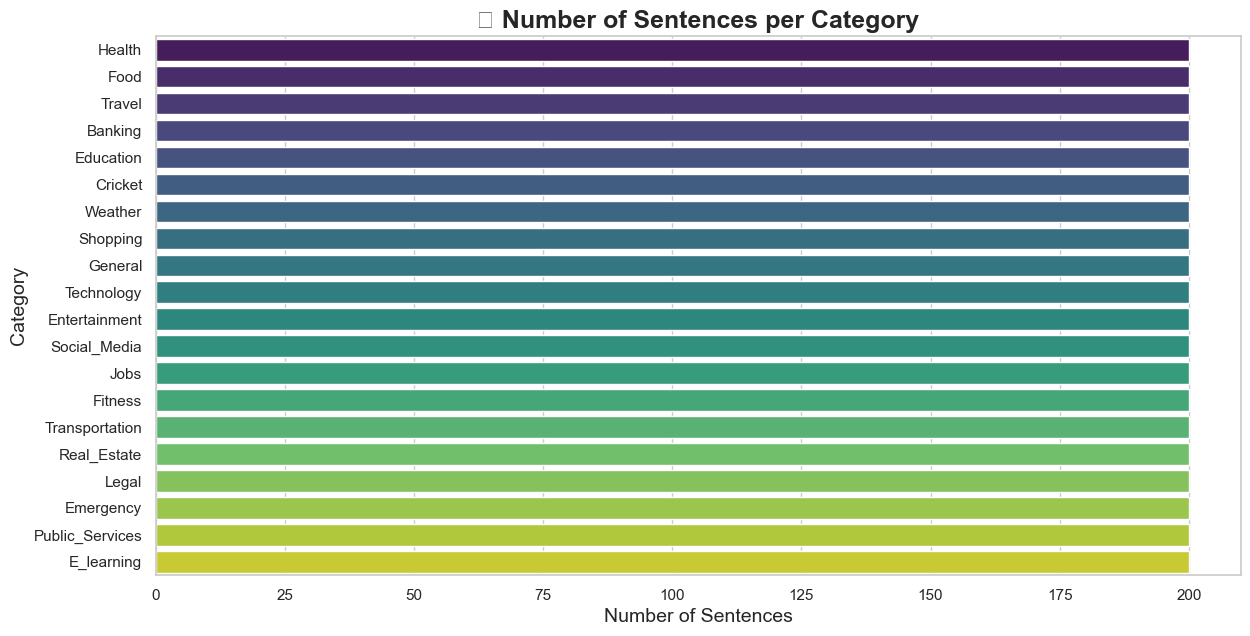

In [7]:
plt.figure(figsize=(14, 7))
order = df['category'].value_counts().index
sns.countplot(data=df, y='category', order=order, palette='viridis')

plt.title('📚 Number of Sentences per Category', fontsize=18, fontweight='bold')
plt.xlabel('Number of Sentences', fontsize=14)
plt.ylabel('Category', fontsize=14)
plt.show()

# 5️⃣ Sentence Length Analysis
To understand the complexity of the sentences, let's calculate the word count for Roman Urdu, Urdu Script, and the English translation. Then, we will plot their distributions side-by-side. 📏

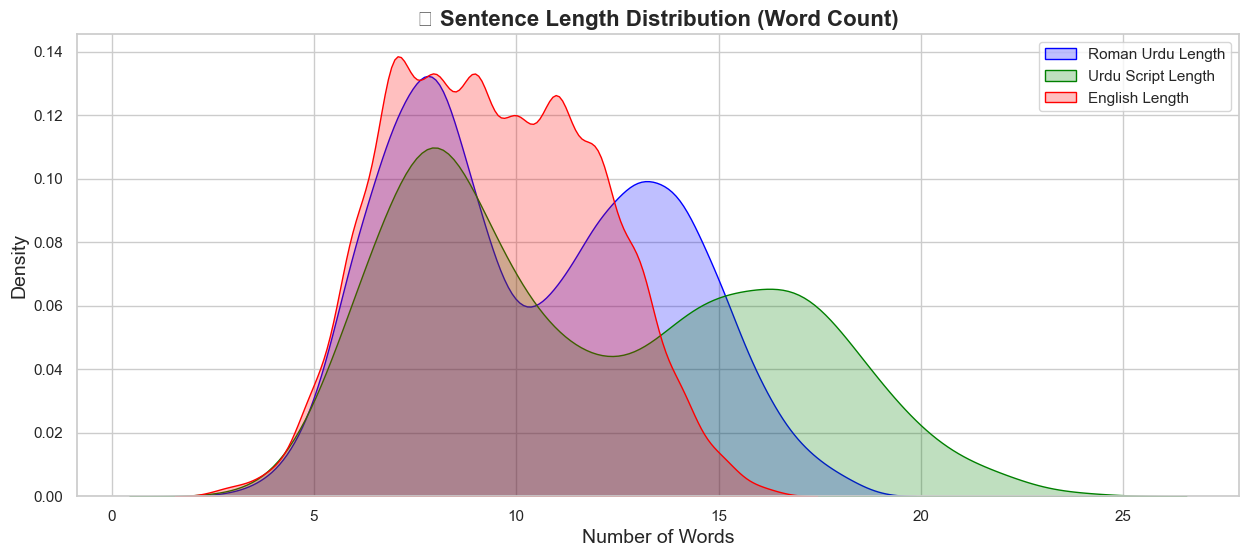

In [8]:
# Create new columns for sentence lengths
df['roman_len'] = df['roman_urdu'].astype(str).apply(lambda x: len(x.split()))
df['urdu_len'] = df['urdu_script'].astype(str).apply(lambda x: len(x.split()))
df['english_len'] = df['translated_by_llm'].astype(str).apply(lambda x: len(x.split()))

# Plot the distributions
plt.figure(figsize=(15, 6))

sns.kdeplot(df['roman_len'], fill=True, color="blue", label="Roman Urdu Length")
sns.kdeplot(df['urdu_len'], fill=True, color="green", label="Urdu Script Length")
sns.kdeplot(df['english_len'], fill=True, color="red", label="English Length")

plt.title('📈 Sentence Length Distribution (Word Count)', fontsize=16, fontweight='bold')
plt.xlabel('Number of Words', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.legend()
plt.show()

# 6️⃣ Top Words in Roman Urdu
What are the most commonly used words in Roman Urdu? Let's filter out common Roman Urdu stop words (like 'hai', 'ki', 'main') and find out! 🗣️

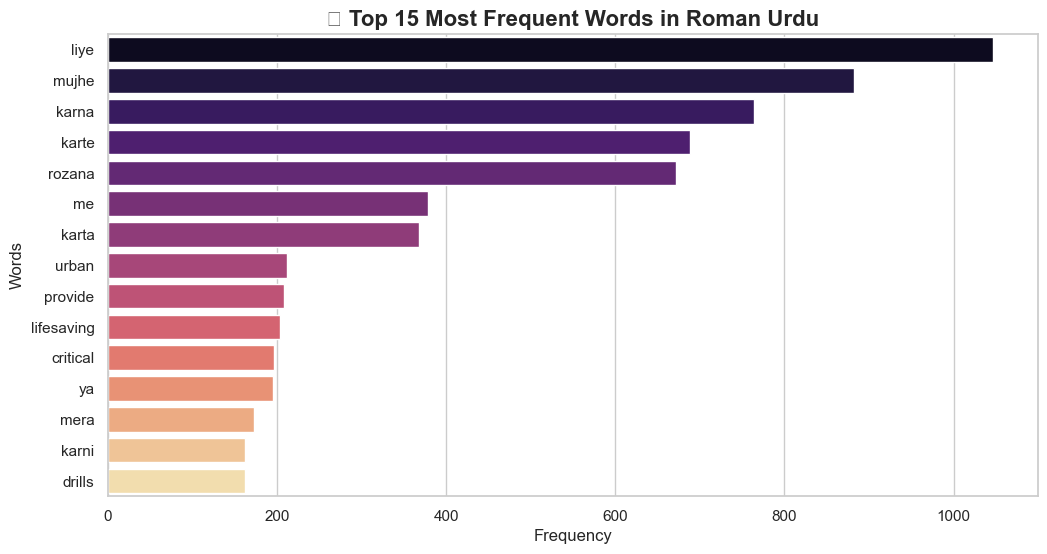

In [9]:
# Basic custom stop words for Roman Urdu
roman_stopwords = {'hai', 'ki', 'ka', 'ke', 'aur', 'ko', 'mein', 'se', 'yeh', 'woh', 'ek', 'hain', 'hi', 'bhi', 'kya', 'par'}

# Get all words
all_roman_words = " ".join(df['roman_urdu'].astype(str).tolist()).lower().split()
filtered_roman_words = [word for word in all_roman_words if word not in roman_stopwords and word.isalpha()]

# Count words
roman_word_counts = Counter(filtered_roman_words).most_common(15)
roman_words, roman_counts = zip(*roman_word_counts)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=list(roman_counts), y=list(roman_words), palette='magma')
plt.title('🥇 Top 15 Most Frequent Words in Roman Urdu', fontsize=16, fontweight='bold')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.show()

# 7️⃣ Top Words in English Translations
Now, let's do the same for the LLM-generated English translations. 🇬🇧

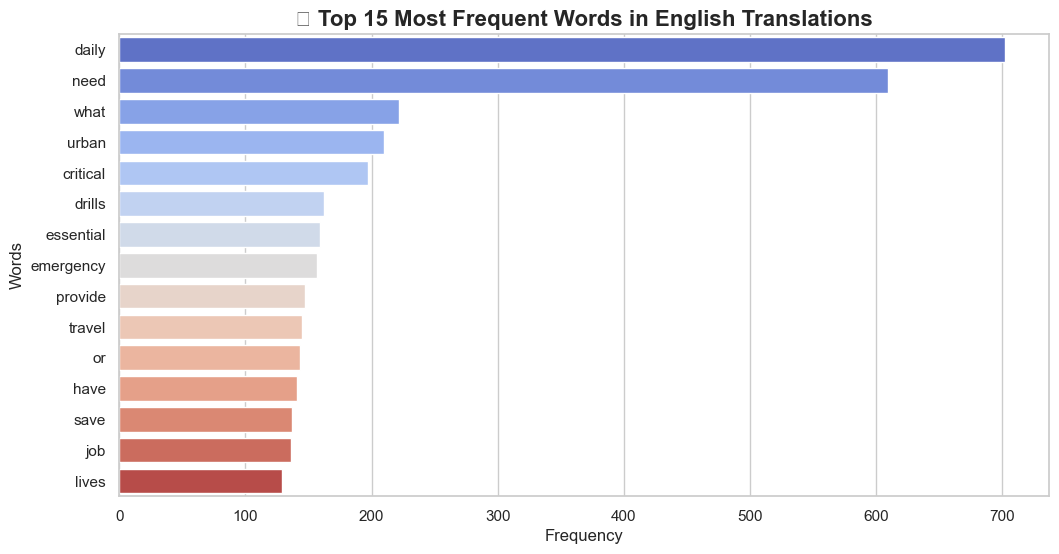

In [10]:
# Basic English stop words
english_stopwords = {'the', 'a', 'to', 'is', 'in', 'and', 'of', 'for', 'you', 'it', 'on', 'with', 'that', 'are', 'this', 'my', 'i'}

# Get all words
all_english_words = " ".join(df['translated_by_llm'].astype(str).tolist()).lower().split()
filtered_eng_words = [word for word in all_english_words if word not in english_stopwords and word.isalpha()]

# Count words
eng_word_counts = Counter(filtered_eng_words).most_common(15)
eng_words, eng_counts = zip(*eng_word_counts)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=list(eng_counts), y=list(eng_words), palette='coolwarm')
plt.title('🥇 Top 15 Most Frequent Words in English Translations', fontsize=16, fontweight='bold')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.show()

# 8️⃣ Category Distribution Pie Chart
A pie chart gives a great perspective on how the dataset is proportioned across its top categories. 🍕

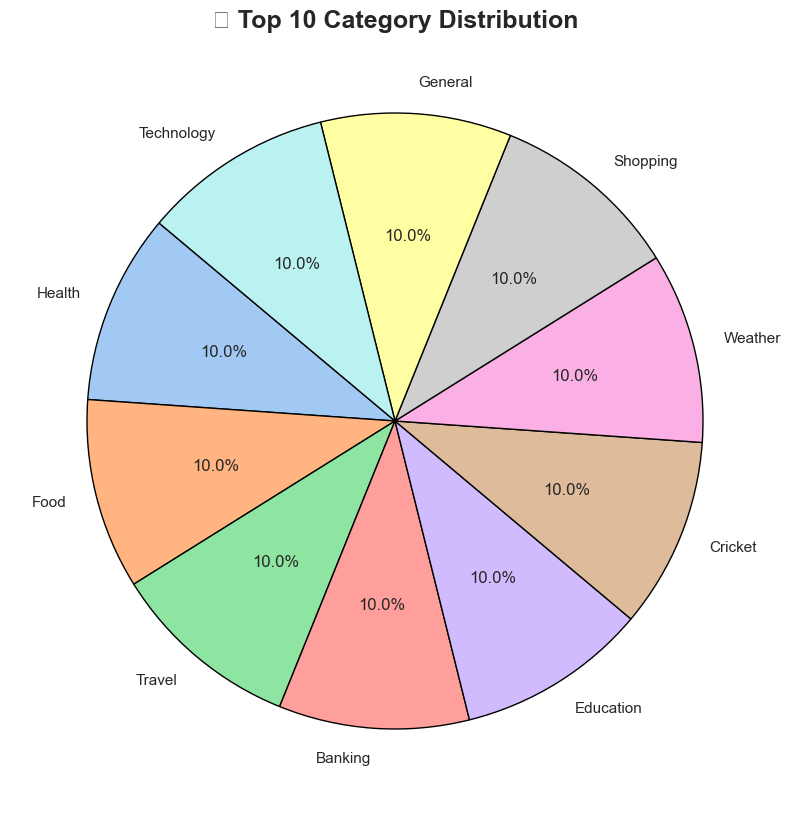

In [11]:
# Taking the top 10 categories to avoid a cluttered pie chart
top_categories = df['category'].value_counts().head(10)

plt.figure(figsize=(10, 10))
plt.pie(top_categories, labels=top_categories.index, autopct='%1.1f%%', 
        startangle=140, colors=sns.color_palette("pastel"), wedgeprops={'edgecolor': 'black'})
plt.title('🥧 Top 10 Category Distribution', fontsize=18, fontweight='bold')
plt.show()

# 🔟 Word Clouds
Word clouds are a stunning way to visualize text data! Let's generate clouds for both Roman Urdu and English.  
*(Note: Rendering Urdu script in WordClouds requires a specific Jameel Noori Nastaleeq TTF font, so we will focus on Roman Urdu and English here).* ☁️

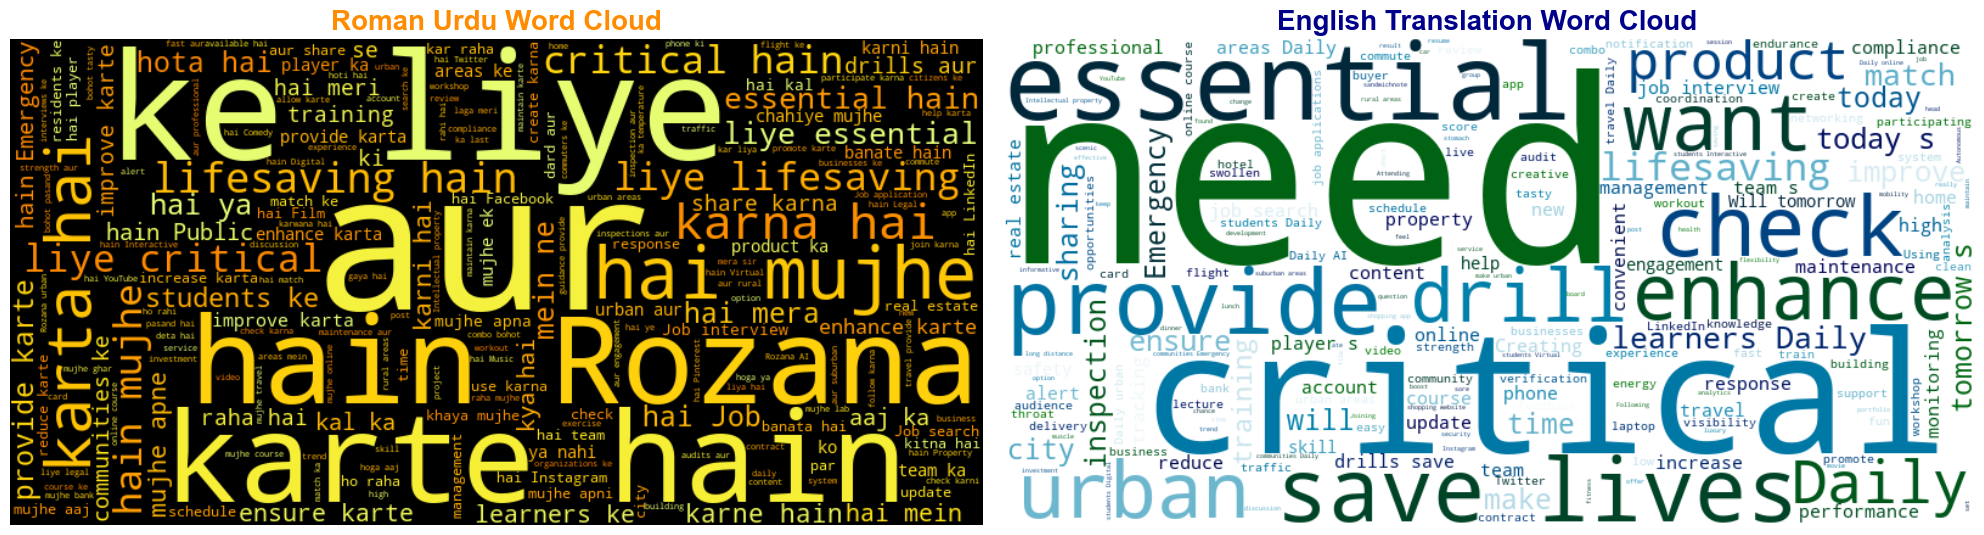

In [12]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

# Roman Urdu Word Cloud
roman_text = " ".join(df['roman_urdu'].astype(str).tolist())
wordcloud_roman = WordCloud(width=800, height=400, background_color='black', colormap='Wistia').generate(roman_text)
axes[0].imshow(wordcloud_roman, interpolation='bilinear')
axes[0].axis('off')
axes[0].set_title('Roman Urdu Word Cloud', fontsize=20, color='darkorange', fontweight='bold')

# English Word Cloud
english_text = " ".join(df['translated_by_llm'].astype(str).tolist())
wordcloud_eng = WordCloud(width=800, height=400, background_color='white', colormap='ocean').generate(english_text)
axes[1].imshow(wordcloud_eng, interpolation='bilinear')
axes[1].axis('off')
axes[1].set_title('English Translation Word Cloud', fontsize=20, color='darkblue', fontweight='bold')

plt.tight_layout()
plt.show()

# 1️⃣1️⃣ Random Examples
Let's pull 3 random rows from the dataset to see the parallel translations in action! 🎲

In [13]:
random_samples = df.sample(3)

for idx, row in random_samples.iterrows():
    print(f"🏷️ Category: {row['category']}")
    print(f"🇵🇰 Roman Urdu: {row['roman_urdu']}")
    print(f"📜 Urdu Script: {row['urdu_script']}")
    print(f"🤖 LLM English: {row['translated_by_llm']}")
    print(f"🌐 Google English: {row['translated_by_google']}")
    print("-" * 80)

🏷️ Category: Health
🇵🇰 Roman Urdu: mujhe sardee aur bukhar hai
📜 Urdu Script: مجھے سردی اور بخار ہے
🤖 LLM English: I have a cold and fever
🌐 Google English: I have chills and fever
--------------------------------------------------------------------------------
🏷️ Category: Travel
🇵🇰 Roman Urdu: mein ne travel checklist ke items ready kar liye hain
📜 Urdu Script: میں نے ٹریول چیک لسٹ کے آئٹمز تیار کر لیے ہیں
🤖 LLM English: I have prepared the items in my travel checklist
🌐 Google English: I have prepared travel checklist items
--------------------------------------------------------------------------------
🏷️ Category: Education
🇵🇰 Roman Urdu: mujhe lecture ke key diagrams copy karne hain
📜 Urdu Script: مجھے لیکچر کے اہم ڈایاگرامز کاپی کرنے ہیں
🤖 LLM English: I need to copy key diagrams from the lecture
🌐 Google English: I have to copy the important diagrams of the lecture
--------------------------------------------------------------------------------


# 1️⃣2️⃣ Notes for Kaggle Users

## 🧩 How to Use This Dataset
- Can be used for **Roman Urdu to English translation tasks**  
- Useful for **NLP research, machine translation, and text preprocessing experiments**  
- Ideal for building **Roman Urdu spell checkers, transliteration, or chatbots**  

### 📌 Columns Description
| Column | Description |
|--------|-------------|
| `category` | Category of sentence (Health, Social_Media, etc.) |
| `roman_urdu` | Sentence in Roman Urdu |
| `urdu_script` | Sentence in Urdu script |
| `translated_by_llm` | English translation generated by LLM |
| `translated_by_google` | English translation from Google Translate (for comparison) |
| `roman_len` | Number of words in Roman Urdu sentence *(Generated in this Notebook)* |
| `urdu_len` | Number of words in Urdu script sentence *(Generated in this Notebook)* |
| `english_len` | Number of words in English translation *(Generated in this Notebook)* |

---
**Thank you for exploring this notebook! If you found it helpful, an upvote ❤️ is highly appreciated!**